# Classification between Lymphoma data Gilbert 
@LaurentMombaerts 31/03/2021

This corresponds to the core set of lymphoma data and GBM data that we were interested in (**2sec exposure time, outliers filtered, GBM randomized**).


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
%whos

Interactive namespace is empty.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io # For Matlab files (.mat)

# Figures size in the notebook 
plt.rcParams['figure.figsize'] = [15, 10]

# Load filtered mat files 
data = scipy.io.loadmat('./data/lymphomaData_update31032021.mat')

print(data.keys())

# PatientsID
GBM_patientsID = pd.DataFrame(data['GBM_patientsID'],columns=['PatientID'])
lympho_patientsID = pd.DataFrame(data['lympho_patientsID'],columns=['PatientID'])

for i in range(lympho_patientsID.shape[0]):
    lympho_patientsID.iloc[i] = lympho_patientsID.iloc[i][0][0]
    
all_patientsID = GBM_patientsID.append(lympho_patientsID).reset_index(drop=True)
for i in range(all_patientsID.shape[0]):
    all_patientsID.iloc[i] = str(all_patientsID.iloc[i])
    
# ramanshift
ramanshift = pd.DataFrame(data['cropped_ramanshift'],columns=['Frequency'])

# Spectrum
GBM_spectrum = pd.DataFrame(data['GBM_spectrums'])
lympho_spectrum = pd.DataFrame(data['lympho_spectrums'])
all_spectrum = GBM_spectrum.append(lympho_spectrum).reset_index(drop=True)

# X frequency axis
ramanshift = data['cropped_ramanshift']
raman_axis = list()
for i in range(np.shape(ramanshift)[0]):
    raman_axis.append(ramanshift[i][0])
ramanshift = raman_axis

# Classes
classes = []
for i in range(np.shape(GBM_patientsID)[0]):
    classes.append(['GBM'])
for i in range(np.shape(lympho_patientsID)[0]):
    classes.append(['Lymphoma'])
classes = pd.DataFrame(classes,columns=['Class'])

# Merge id and class
all_infos = pd.concat([all_patientsID,classes],axis=1)

dict_keys(['__header__', '__version__', '__globals__', 'GBM_patientsID', 'GBM_scanID', 'GBM_spectrums', 'cropped_ramanshift', 'lympho_patientsID', 'lympho_spectrums'])


In [19]:
# Quick stats 
print('Infos patients and spectrums : ')
print(all_infos.groupby(['Class']).count())
print('')
print(GBM_patientsID.value_counts())
print('')
print(lympho_patientsID.value_counts())

print(GBM_spectrum.shape)

Infos patients and spectrums : 
          PatientID
Class              
GBM              54
Lymphoma         21

PatientID
9684312      6
7675102      6
7343902      6
6962092      6
6412272      6
2993612      6
957252       6
171612       6
8913022      3
4896412      3
dtype: int64

PatientID    
7889202_2_sec    9
36702            6
1706032          6
dtype: int64
(54, 1613)


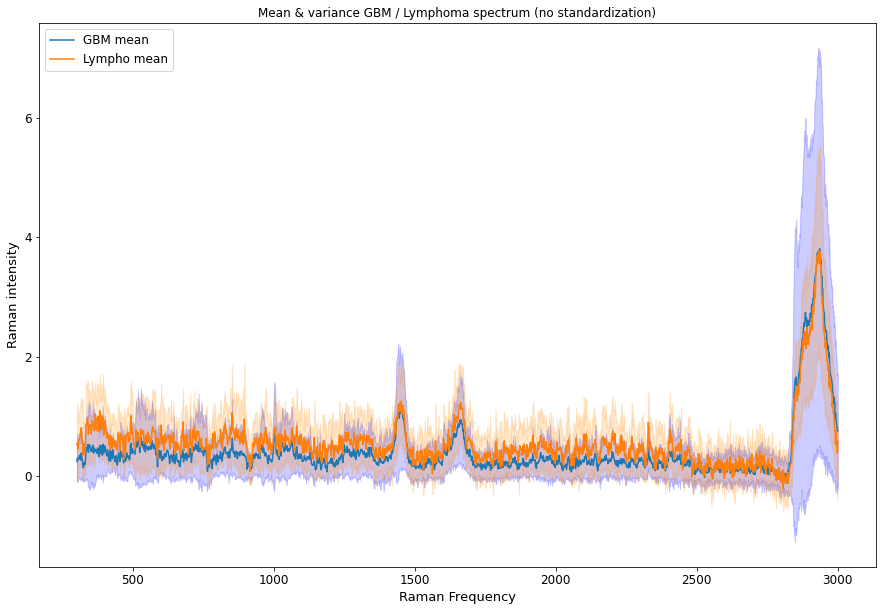

In [20]:
# Lets plot mean/variance for both mean spectrum signals (GBM and lymphoma)
mean_GBM = GBM_spectrum.mean(axis=0)
std_GBM = GBM_spectrum.std(axis=0)
mean_lympho = lympho_spectrum.mean(axis=0)
std_lympho = lympho_spectrum.std(axis=0)

x_axis_ticks = ramanshift

plt.figure()
plt.title('Mean & variance GBM / Lymphoma spectrum (no standardization)')
plt.xlabel('Raman Frequency')
plt.ylabel('Raman intensity')
plt.plot(x_axis_ticks, mean_GBM)
plt.plot(x_axis_ticks, mean_lympho)
plt.fill_between(x_axis_ticks, mean_GBM - std_GBM, mean_GBM + std_GBM, color='blue', alpha=.2)
plt.fill_between(x_axis_ticks, mean_lympho - std_lympho, mean_lympho + std_lympho, color='darkorange', alpha=.2)
plt.legend(['GBM mean','Lympho mean'],loc='upper left')
#plt.savefig('GBM_Lymphoma_mean_std.pdf')
plt.show()

**Note : it seems very consistent now**

[7343902  171612 9684312 7675102  957252 2993612 4896412 6412272 6962092
 8913022]
['36702' '1706032' '7889202_2_sec']


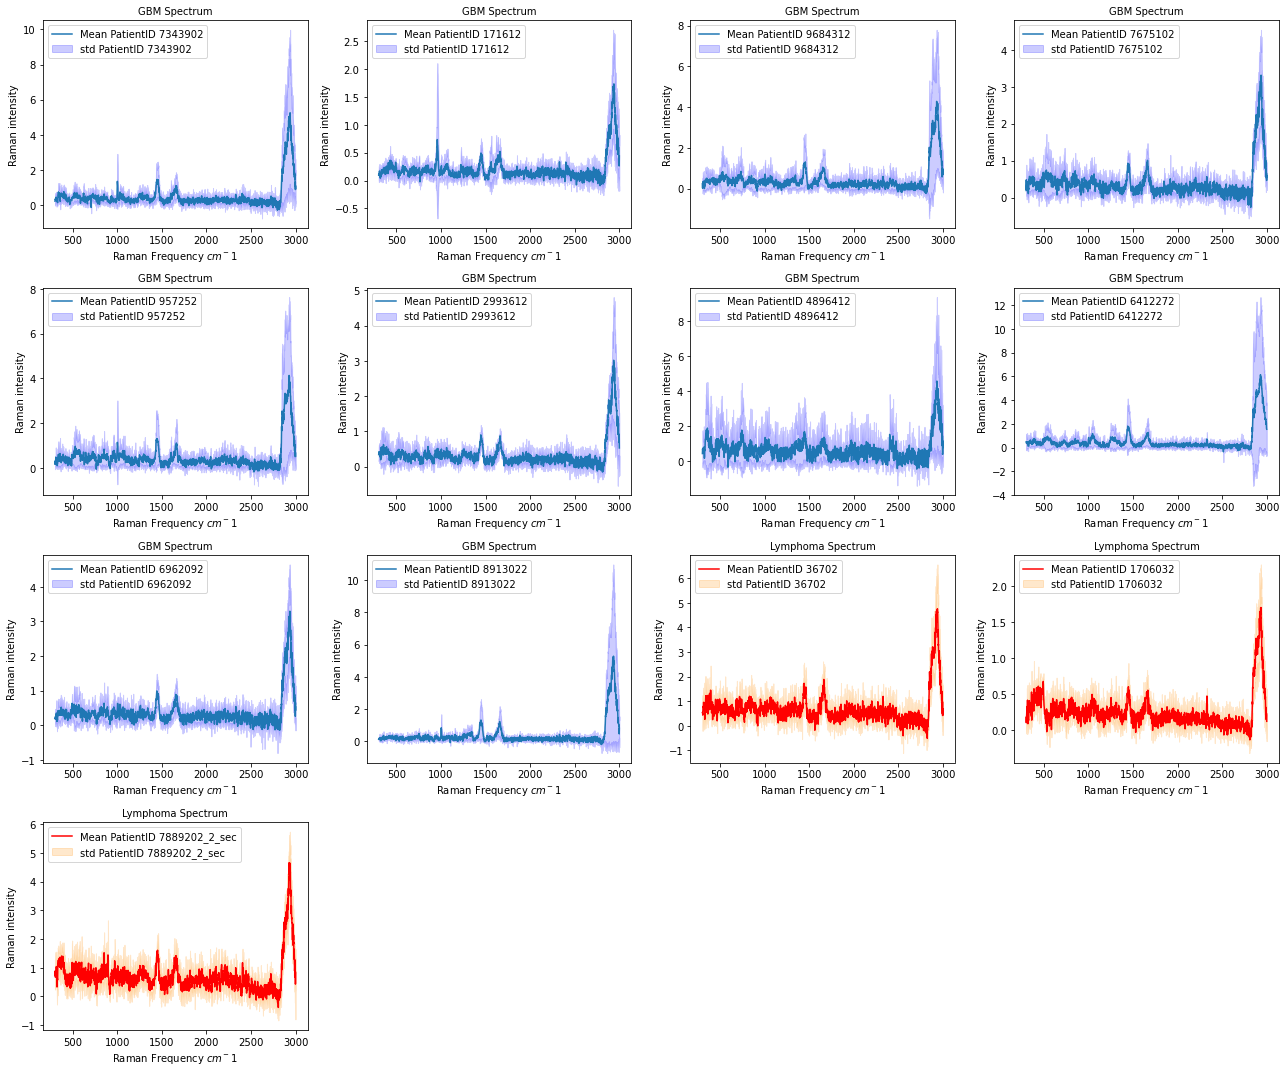

In [21]:
# Plot variability by patient

uniqueGBMPatient = GBM_patientsID['PatientID'].unique()
uniqueLymphoPatient = lympho_patientsID['PatientID'].unique()
print(uniqueGBMPatient)
print(uniqueLymphoPatient)

x_axis_ticks = ramanshift

plt.figure(figsize=[18,15])
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)     
plt.rc('axes', labelsize=10)

temp = 1
for patientID in uniqueGBMPatient:
    spectrumToConsider = GBM_spectrum[GBM_patientsID['PatientID'] == patientID].reset_index(drop=True)
    mean_spec = spectrumToConsider.mean(axis=0)
    std_spec = spectrumToConsider.std(axis=0)  
    plt.subplot(4,4,temp)
    plt.title('GBM Spectrum')
    plt.xlabel('Raman Frequency $cm{^-1}$')
    plt.ylabel('Raman intensity')
    plt.plot(x_axis_ticks, mean_spec, label='Mean PatientID ' + str(patientID))
    plt.fill_between(x_axis_ticks, mean_spec - std_spec, mean_spec + std_spec, color='blue', alpha=.2, label='std PatientID ' + str(patientID))
    plt.legend(loc='upper left')
    temp = temp + 1
    #plt.savefig('GBM_Patient_' + str(patientID) + '.pdf')
    
for patientID in uniqueLymphoPatient:
    spectrumToConsider = lympho_spectrum[lympho_patientsID['PatientID'] == patientID].reset_index(drop=True)
    mean_spec = spectrumToConsider.mean(axis=0)
    std_spec = spectrumToConsider.std(axis=0)
    plt.subplot(4,4,temp)
    plt.title('Lymphoma Spectrum')
    plt.xlabel('Raman Frequency $cm{^-1}$')
    plt.ylabel('Raman intensity')
    plt.plot(x_axis_ticks, mean_spec, color='red',label='Mean PatientID ' + str(patientID))
    plt.fill_between(x_axis_ticks, mean_spec - std_spec, mean_spec + std_spec, color='darkorange', alpha=.2, label='std PatientID ' + str(patientID))
    plt.legend(loc='upper left')
    #plt.savefig('Lymphoma_Patient_' + str(patientID) + '.pdf')
    temp = temp + 1
plt.tight_layout()
plt.savefig('Supp_Figure_1.pdf',dpi=800)
plt.show()


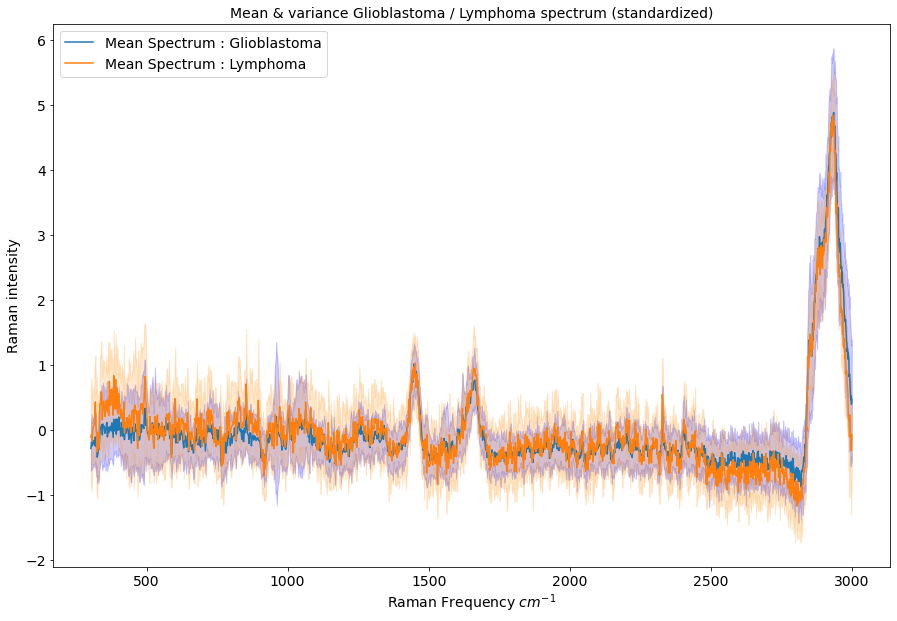

In [6]:
# Let's try to standardize each spectrum individually (towards variance = 1) and see the resulting means and clusters
from sklearn.preprocessing import StandardScaler

# Define scaler
scaler = StandardScaler()
all_spectrum_standardized = all_spectrum
for i in range(all_spectrum.shape[0]):
    standardized_Spectrum = scaler.fit_transform(np.array(all_spectrum.iloc[i,:]).reshape(-1, 1))
    all_spectrum_standardized.iloc[i,:] = np.reshape(standardized_Spectrum,(len(standardized_Spectrum),))
    
# New stats
mean_GBM = all_spectrum_standardized[classes['Class'] == 'GBM'].mean(axis=0)
std_GBM = all_spectrum_standardized[classes['Class'] == 'GBM'].std(axis=0)
mean_lympho = all_spectrum_standardized[classes['Class'] == 'Lymphoma'].mean(axis=0)
std_lympho = all_spectrum_standardized[classes['Class'] == 'Lymphoma'].std(axis=0)

x_axis_ticks = ramanshift

# New standardized
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)     
plt.rc('axes', labelsize=14)

plt.figure()
plt.title('Mean & variance Glioblastoma / Lymphoma spectrum (standardized)')
plt.xlabel('Raman Frequency $cm^{-1}$')
plt.ylabel('Raman intensity')
plt.plot(x_axis_ticks, mean_GBM)
plt.plot(x_axis_ticks, mean_lympho)
plt.fill_between(x_axis_ticks, mean_GBM - std_GBM, mean_GBM + std_GBM, color='blue', alpha=.2)
plt.fill_between(x_axis_ticks, mean_lympho - std_lympho, mean_lympho + std_lympho, color='darkorange', alpha=.2)
plt.legend(['Mean Spectrum : Glioblastoma','Mean Spectrum : Lymphoma'],loc='upper left')
plt.savefig('Figure_2_lymphomaPaper.pdf', dpi=800)
plt.show()

**Unsupervised data exploration**

Total explained variance in 2D : 0.170526052078472
Max explained variance with current components : 0.9654411820692431
Total explained variance in 2D : 0.17945943706239648
Max explained variance with current components : 1.0000000000000002
Total explained variance in 2D : 0.27619526247182064
Max explained variance with current components : 0.9450591228042332


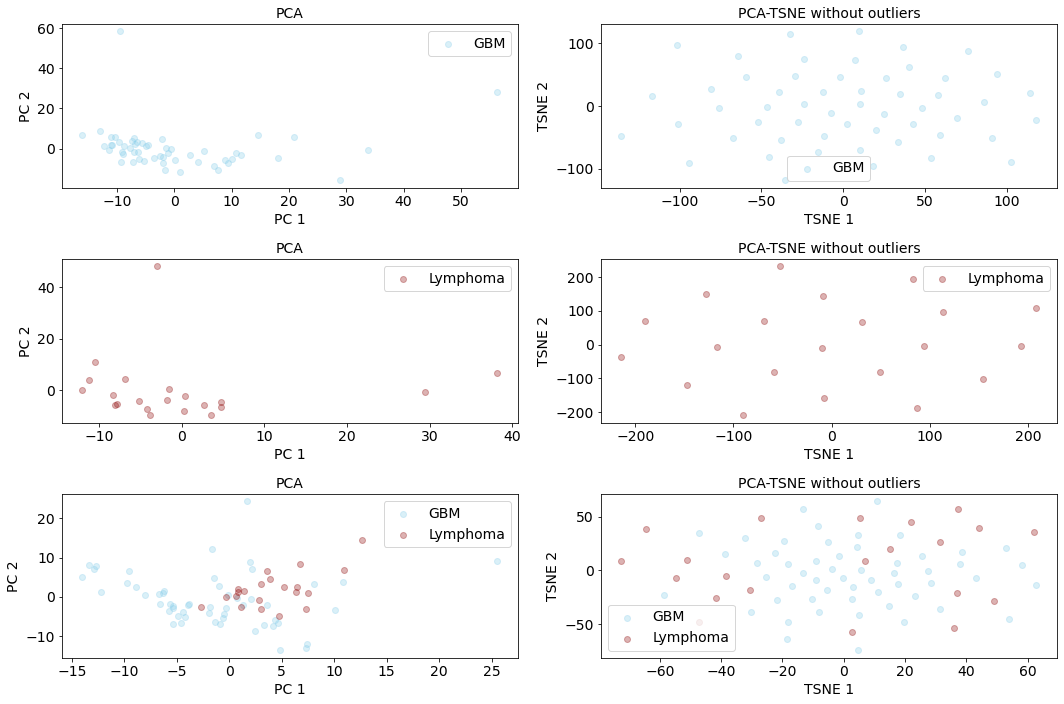

In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# GBM 
idx_GBM = classes['Class'] == 'GBM'
idx_GBM_bis = [i for i, x in enumerate(idx_GBM) if x]

# Define opposite axis scaler
scaler = StandardScaler()
all_spectrum_standardized_GBM = np.zeros(all_spectrum_standardized.iloc[idx_GBM_bis,:].shape)
for i in range(all_spectrum.shape[1]):
    standardized_Spectrum = scaler.fit_transform(np.array(all_spectrum_standardized.iloc[idx_GBM_bis,i]).reshape(-1,1))
    all_spectrum_standardized_GBM[:,i] = np.reshape(standardized_Spectrum,(len(standardized_Spectrum),))
    
# PCA
pca = PCA(n_components=40)
pca_result = pca.fit_transform(all_spectrum_standardized_GBM)
explained_var = pca.explained_variance_ratio_.cumsum()
print('Total explained variance in 2D : ' + str(explained_var[1]))
print('Max explained variance with current components : ' + str(explained_var[-1]))

plt.figure()
plt.subplot(3,2,1)
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, color=['skyblue'], label='GBM')
#plt.scatter(pca_result[idx_lymphoma,0], pca_result[idx_lymphoma,1], alpha=0.3, color=['darkred'], label='Lymphoma')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['GBM'])
plt.title('PCA')

# PCA + TSNE analysis to reduce dimensionality beforehand 
tsne_results = TSNE(random_state = 0, n_components=2, verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result)

plt.subplot(3,2,2)
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.3, color=['skyblue'], label='GBM')
#plt.scatter(tsne_results[idx_lymphoma,0], tsne_results[idx_lymphoma,1], alpha=0.3, color=['darkred'], label='Lymphoma')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(['GBM'])
plt.title('PCA-TSNE without outliers')

# Lymphoma
idx_lymphoma = classes['Class'] == 'Lymphoma'
idx_lymphoma_bis = [i for i, x in enumerate(idx_lymphoma) if x]

# Define opposite axis scaler
scaler = StandardScaler()
all_spectrum_standardized_lympho = np.zeros(all_spectrum_standardized.iloc[idx_lymphoma_bis,:].shape)
for i in range(all_spectrum.shape[1]):
    standardized_Spectrum = scaler.fit_transform(np.array(all_spectrum_standardized.iloc[idx_lymphoma_bis,i]).reshape(-1,1))
    all_spectrum_standardized_lympho[:,i] = np.reshape(standardized_Spectrum,(len(standardized_Spectrum),))
    
# PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(all_spectrum_standardized_lympho)
explained_var = pca.explained_variance_ratio_.cumsum()
print('Total explained variance in 2D : ' + str(explained_var[1]))
print('Max explained variance with current components : ' + str(explained_var[-1]))

plt.subplot(3,2,3)
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, color=['darkred'], label='Lymphoma')
#plt.scatter(pca_result[idx_lymphoma,0], pca_result[idx_lymphoma,1], alpha=0.3, color=['darkred'], label='Lymphoma')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['Lymphoma'])
plt.title('PCA')

# PCA + TSNE analysis to reduce dimensionality beforehand 
tsne_results = TSNE(random_state = 0, n_components=2, verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result)

plt.subplot(3,2,4)
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.3, color=['darkred'], label='Lymphoma')
#plt.scatter(tsne_results[idx_lymphoma,0], tsne_results[idx_lymphoma,1], alpha=0.3, color=['darkred'], label='Lymphoma')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(['Lymphoma'])
plt.title('PCA-TSNE without outliers')

# Both
# PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(all_spectrum_standardized)
explained_var = pca.explained_variance_ratio_.cumsum()
print('Total explained variance in 2D : ' + str(explained_var[2]))
print('Max explained variance with current components : ' + str(explained_var[-1]))

plt.subplot(3,2,5)
plt.scatter(pca_result[idx_GBM,0], pca_result[idx_GBM,1], alpha=0.3, color=['skyblue'], label='GBM')
plt.scatter(pca_result[idx_lymphoma,0], pca_result[idx_lymphoma,1], alpha=0.3, color=['darkred'], label='Lymphoma')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['GBM','Lymphoma'])
plt.title('PCA')

# PCA + TSNE analysis to reduce dimensionality beforehand 
tsne_results = TSNE(random_state = 0, n_components=2, verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result)

plt.subplot(3,2,6)
plt.scatter(tsne_results[idx_GBM,0], tsne_results[idx_GBM,1], alpha=0.3, color=['skyblue'], label='GBM')
plt.scatter(tsne_results[idx_lymphoma,0], tsne_results[idx_lymphoma,1], alpha=0.3, color=['darkred'], label='Lymphoma')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(['GBM','Lymphoma'])
plt.title('PCA-TSNE without outliers')
plt.tight_layout()
plt.show()

**TSNE hyperparameters changes**

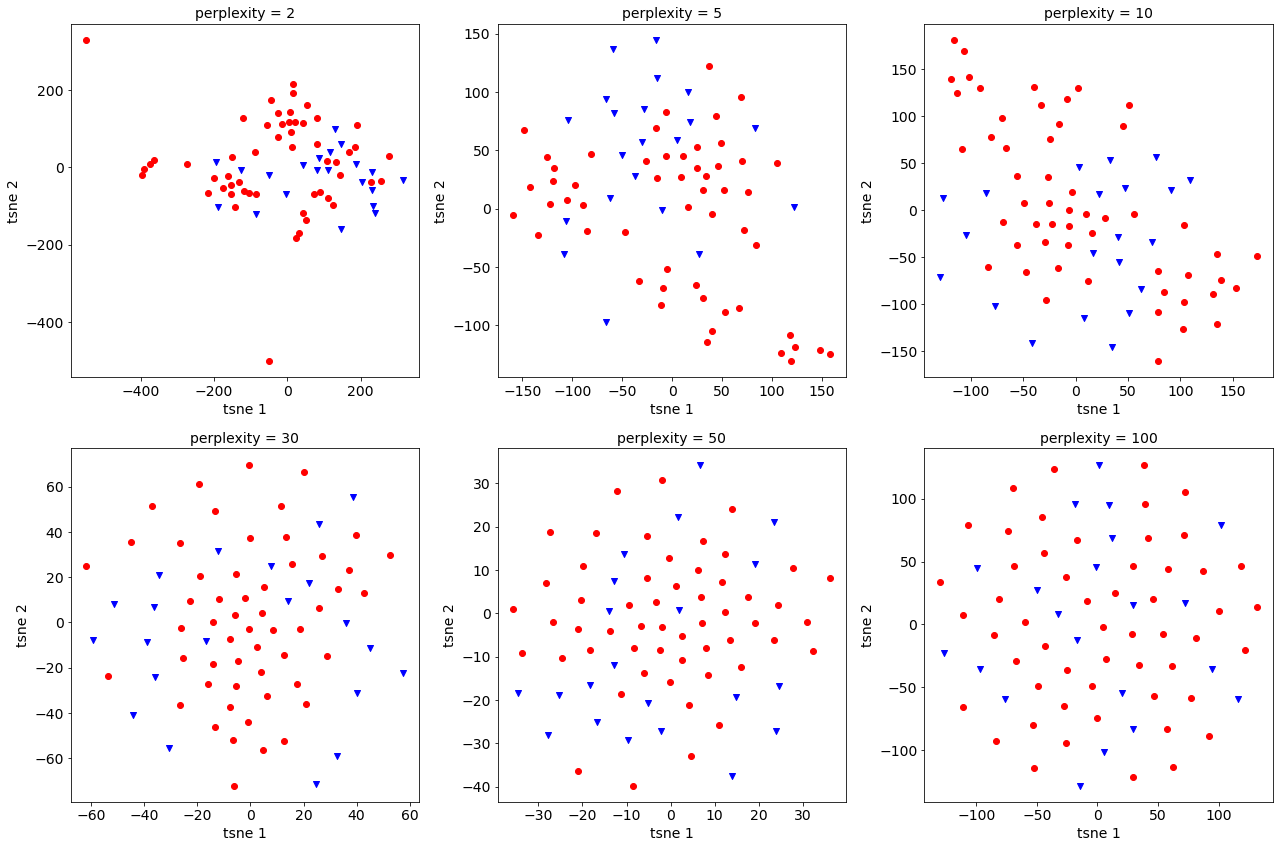

[1.7268096208572388, 1.2449212074279785, 0.9640661478042603, 0.6286510229110718, 0.5058085322380066, 0.6922427415847778]


In [9]:
#TSNE test
from sklearn import manifold

GBM_patientsID = pd.DataFrame(data['GBM_patientsID'],columns=['PatientID'])
lympho_patientsID = pd.DataFrame(data['lympho_patientsID'],columns=['PatientID'])

for i in range(lympho_patientsID.shape[0]):
    lympho_patientsID.iloc[i] = lympho_patientsID.iloc[i][0][0]
    
all_patientsID = GBM_patientsID.append(lympho_patientsID).reset_index(drop=True)

X = all_spectrum_standardized
y = classes
groups = all_patientsID

#tSNE
plt.figure(figsize=(18,12))

perplexities = [2, 5, 10, 30, 50, 100]
kl_div = []
for i in range(6):
    
    tsne = manifold.TSNE(n_components=2, init='pca', perplexity=perplexities[i], random_state=0)
    fit_tsne = tsne.fit(X)
    kl_div.append(fit_tsne.kl_divergence_)
    tsne_result = tsne.fit_transform(X)

    plt.subplot(2,3,i+1)
    for j in np.unique(GBM_patientsID):
        idx_yi = groups == j
        plt.scatter(tsne_result[np.where(idx_yi)[0],0], tsne_result[np.where(idx_yi)[0],1],c='red',marker='o')
        
    for j in np.unique(lympho_patientsID):
        idx_yi = groups == j
        plt.scatter(tsne_result[np.where(idx_yi)[0],0], tsne_result[np.where(idx_yi)[0],1], c='blue',marker='v')
        
    plt.title('perplexity = ' +str(perplexities[i]))
    plt.xlabel('tsne 1')
    plt.ylabel('tsne 2')
    
plt.tight_layout()
plt.show()
print(kl_div)

## Classification, ROC Curve, confusion matrices (starts with LR, then RF / SVM)

**Functions**

In [10]:
# To run before any classification

from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, RepeatedKFold, cross_val_score, RepeatedStratifiedKFold, GroupShuffleSplit, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#import shap

def findOptimalPointROC(mean_tpr,mean_fpr):
    dist = np.ones(len(mean_tpr),)
    for i in range(len(mean_tpr)):
        dist[i] = np.sqrt((0-mean_fpr[i])**2 + (1-mean_tpr[i])**2)
    opt_idx = np.where(dist == min(dist))
    return mean_tpr[opt_idx], mean_fpr[opt_idx]

def findOptimalPointPRC(mean_precision,mean_recall):
    dist = np.ones(len(mean_precision),)
    for i in range(len(mean_precision)):
        dist[i] = np.sqrt((1-mean_recall[i])**2 + (1-mean_precision[i])**2)
    opt_idx = np.where(dist == min(dist))
    return mean_precision[opt_idx], mean_recall[opt_idx]

def plotROC(tprs,mean_fpr,aucs):
    
    fig, ax = plt.subplots()       
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='navy',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='darkorange',
            label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Internal Validation ROC Curve")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    tpr_opt, fpr_opt = findOptimalPointROC(mean_tpr,mean_fpr) # Find optimal point ROC (closest from top left)
    #ax.plot(fpr_opt, tpr_opt,'bo-', label=r'Optimal Decision : (%0.2f , %0.2f)' % (fpr_opt,tpr_opt))
    ax.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return

def plot_allROC(tprs,mean_fpr,aucs):
    
    fig, ax = plt.subplots()       
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='navy',
            label='Chance', alpha=.8)
    
    for i in range(np.shape(tprs)[0]):
        ax.plot(mean_fpr, tprs[i],
                label=r'Mean ROC (AUC = %0.4f)' % (aucs[i]),
                lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Internal Validation ROC Curve")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.tight_layout()
    ax.legend(loc="lower right")
    plt.show()

    return

def plotPR(precisions,mean_recall,auprs,no_sk):
    
    fig, ax = plt.subplots()
    plt.plot([0, 1], [no_sk, no_sk], linestyle='--',color='navy', label='Chance')
    
    mean_precision = np.mean(precisions, axis=0)
    mean_aupr = auc(mean_recall, mean_precision)
    std_aupr = np.std(auprs)
    ax.plot(mean_recall, mean_precision, color='darkorange',
            label=r'Mean PR (AUC = %0.2f $\pm$ %0.2f)' % (mean_aupr, std_aupr),
            lw=2, alpha=.8)

    std_precision = np.std(precisions, axis=0)
    precisions_upper = np.minimum(mean_precision + std_precision, 1)
    precisions_lower = np.maximum(mean_precision - std_precision, 0)
    ax.fill_between(mean_recall, precisions_lower, precisions_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="PR Curve Internal Validation")

    plt.xlabel("Recall")
    plt.ylabel("Precision")  
    

    mean_precision_opt, mean_recall_opt = findOptimalPointPRC(mean_precision,mean_recall)
    #ax.plot(mean_recall_opt, mean_precision_opt,'bo-', label=r'Optimal Decision : (%0.2f , %0.2f)' % (mean_recall_opt,mean_precision_opt))
    ax.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

    return

def plot_allPR(precisions,mean_recall,auprs):
    
    fig, ax = plt.subplots()
    for i in range(np.shape(precisions)[0]):
        ax.plot(mean_recall, precisions[i],
                label=r'Mean PR (AUC = %0.2f)' % (auprs[i]),
                lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="PR Curve Internal Validation")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid()
    plt.tight_layout()
    ax.legend(loc="lower right")
    plt.show()

    return

def plotF1_scores(thresholds, F1_scores_atThr):

    max_mean_f1_idx = np.argmax(np.mean(F1_scores_atThr,axis=0))
    f1_at_max = np.array(F1_scores_atThr)[:,max_mean_f1_idx]
    print('Best threshold (max F1 score) : ' + str(thresholds[max_mean_f1_idx]))
    print('Best mean F1 score : ' + str(np.mean(f1_at_max)))
    print('Corresponding std at argmax best F1 score : ' + str(np.std(f1_at_max)))

    f1_upper = np.minimum(np.mean(F1_scores_atThr,axis=0) + np.std(F1_scores_atThr,axis=0), 1)
    f1_lower = np.maximum(np.mean(F1_scores_atThr,axis=0) - np.std(F1_scores_atThr,axis=0), 0)

    plt.figure()
    plt.plot(thresholds,np.mean(F1_scores_atThr,axis=0))
    plt.fill_between(thresholds, f1_upper, f1_lower, color='grey', alpha=.2)
    plt.plot(thresholds[max_mean_f1_idx], np.mean(f1_at_max),'bo-', label=r'Optimal Decision : (%0.2f , %0.2f)' % (thresholds[max_mean_f1_idx],np.mean(f1_at_max)))
    plt.title('F1 score by threshold')
    plt.xlabel('Thresholds')
    plt.ylabel('F1 score')
    plt.legend()
    plt.show()
    
    return

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return TP, FP, TN, FN

def g_means_computation(y_actual, y_hat):
    
    TP, FP, TN, FN = perf_measure(y_actual,y_hat)
    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)
    
    return np.sqrt(tpr * (1-fpr))
    
def return_tpr(y_actual, y_hat):
    
    TP, FP, TN, FN = perf_measure(y_actual,y_hat)
    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)
    
    return tpr

def return_fpr(y_actual, y_hat):
    
    TP, FP, TN, FN = perf_measure(y_actual,y_hat)
    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)
    
    return fpr

def plotgmeans_scores(thresholds, gmeans):

    max_mean_gmeans_idx = np.argmax(np.mean(gmeans,axis=0))
    gmeans_at_max = np.array(gmeans)[:,max_mean_gmeans_idx]
    print('Best threshold (max gmean score) : ' + str(thresholds[max_mean_gmeans_idx]))
    print('Best mean gmean score : ' + str(np.mean(gmeans_at_max)))
    print('Corresponding std at argmax best gmean score : ' + str(np.std(gmeans_at_max)))

    gmeans_upper = np.minimum(np.mean(gmeans,axis=0) + np.std(gmeans,axis=0), 1)
    gmeans_lower = np.maximum(np.mean(gmeans,axis=0) - np.std(gmeans,axis=0), 0)

    #plt.figure()
    #plt.plot(thresholds,np.mean(gmeans,axis=0))
    #plt.fill_between(thresholds, gmeans_upper, gmeans_lower, color='grey', alpha=.2)
    #plt.plot(thresholds[max_mean_gmeans_idx], np.mean(gmeans_at_max),'bo-', label=r'Optimal Decision : (%0.2f , %0.2f)' % (thresholds[max_mean_gmeans_idx],np.mean(gmeans_at_max)))
    #plt.title('Gmeans score by threshold')
    #plt.xlabel('Thresholds')
    #plt.ylabel('Gmean score')
    #plt.legend()
    #plt.show()
    
    return thresholds[max_mean_gmeans_idx], max_mean_gmeans_idx

def computeOverall_Metrics_atBestThr(perf_storage,bestThr_idx):
    #TP, FP, TN, FN
    all_sensitivity = []
    all_specificity = []
    all_precision = []
    all_accuracy = []
    all_b_accuracy = []
    
    metrics = dict()
    
    for i in range(np.shape(perf_storage)[0]):
        TP = perf_storage[i][bestThr_idx][0]
        FP = perf_storage[i][bestThr_idx][1]
        TN = perf_storage[i][bestThr_idx][2]
        FN = perf_storage[i][bestThr_idx][3]
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        precision = TP/(TP+FP)
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        b_accuracy = (sensitivity + specificity) / 2
        all_sensitivity.append(sensitivity)
        all_specificity.append(specificity)
        all_precision.append(precision)
        all_accuracy.append(accuracy)
        all_b_accuracy.append(b_accuracy)
        
    print('')
    print('Sensitivity = ' + str(np.mean(all_sensitivity)) + ' +- ' + str(np.std(all_sensitivity)))
    print('Specificity = ' + str(np.mean(all_specificity)) + ' +- ' + str(np.std(all_specificity)))
    print('Precision = ' + str(np.mean(all_precision)) + ' +- ' + str(np.std(all_precision)))
    print('Accuracy = ' + str(np.mean(all_accuracy)) + ' +- ' + str(np.std(all_accuracy)))
    print('Balanced accuracy = ' + str(np.mean(all_b_accuracy)) + ' +- ' + str(np.std(all_b_accuracy)))
    
    metrics['Sensitivity'] = all_sensitivity
    metrics['Specificity'] = all_specificity
    metrics['Precision'] = all_precision
    metrics['Accuracy'] = all_accuracy
    metrics['Balanced_accuracy'] = all_b_accuracy

    return metrics

def trainModel(X,y,model,folds):
    
    # Init perf
    tprs = []
    precisions = []
    aucs = []
    auprs = []
    mean_fpr = np.linspace(0, 1, 100)    
    mean_recall = np.linspace(0, 1, 100)
    F1_scores_atThr = []
    all_gmeans = []
    perf_storage = []
    all_tprs = []
    all_fprs = []
    
    no_sk = []
    # Training loop
    for j, (train, test) in enumerate(folds.split(X, y)):

        # CV definition
        X_train, X_test = X.iloc[train,:], X.iloc[test,:]
        y_train, y_test = y[train],y[test]

        # Model definition
        model.fit(X_train,y_train)
        y_scores = model.predict_proba(X_test)

        # FPR, TPR, ROC Scores append internal
        fpr, tpr, thresh_roc = roc_curve(y_test, y_scores[:,1])
        roc_auc = auc(fpr,tpr)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        tprs.append(interp_tpr)
        aucs.append(roc_auc)       

        # calculate the g-mean for each threshold 
        thresholds = np.arange(0, 1, 0.001)
        scores_tpr = [return_tpr(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
        all_tprs.append(scores_tpr)
        scores_fpr = [return_fpr(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
        all_fprs.append(scores_fpr)
        
        scores_g = [g_means_computation(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
        all_gmeans.append(scores_g)

        # Precision, Recall, PR Scores append internal
        precision, recall, thresh_pr = precision_recall_curve(y_test, y_scores[:,1])
        aupr = auc(recall, precision)      
        reversed_recall = np.fliplr([recall])[0]
        reversed_precision = np.fliplr([precision])[0]
        interp_precision = np.interp(mean_recall, reversed_recall, reversed_precision)
        precisions.append(interp_precision)
        auprs.append(aupr)

        no_sk.append(len(y_test[y_test==1]) / len(y_test))

        # (Somehow redundant for now:) Compute F1 score at each threshold - should be improved by interpolation with roc_curve
        # define thresholds & evaluate at each threshold
        thresholds = np.arange(0, 1, 0.001)
        scores = [f1_score(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
        F1_scores_atThr.append(scores)

        # Compute performances metrics at all thresholds
        perf_metrics = [perf_measure(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
        perf_storage.append(perf_metrics)

    #plotROC(tprs,mean_fpr,aucs)
    #plotPR(precisions,mean_recall,auprs,np.mean(no_sk))
    plotROC_PR(tprs,mean_fpr,aucs,precisions,mean_recall,auprs,np.mean(no_sk),0)
    
    # plotF1_scores(thresholds, F1_scores_atThr)
    bestThr, bestThr_idx = plotgmeans_scores(thresholds, all_gmeans)
    metrics = computeOverall_Metrics_atBestThr(perf_storage,bestThr_idx)
    #plot_allROC(tprs,mean_fpr,aucs)
    #plot_allPR(precisions,mean_recall,auprs)
    
    metrics['AUROC'] = aucs
    metrics['AUPR'] = auprs
    
    print('AUROC = ' + str(np.mean(aucs)) + ' +- ' + str(np.std(aucs)))
    print('AUPR = ' + str(np.mean(auprs)) + ' +- ' + str(np.std(auprs)))
    
    metrics['TPRS_by_threshold'] = all_tprs
    metrics['FPRS_by_threshold'] = all_fprs
    
    return metrics

def trainModel_patientSplit(X,y,groups,model,splits):
    
    # Init perf
    tprs = []
    precisions = []
    aucs = []
    auprs = []
    mean_fpr = np.linspace(0, 1, 100)    
    mean_recall = np.linspace(0, 1, 100)
    F1_scores_atThr = []
    all_gmeans = []
    perf_storage = []
    no_sk = []
    
    for random_split in range(splits):
        gss = GroupShuffleSplit(n_splits=1, train_size=.75, random_state=random_split)
        gss.get_n_splits()

        for train, test in gss.split(X, y, groups):
            # CV definition
            X_train, X_test = X.iloc[train,:], X.iloc[test,:]
            y_train, y_test = y[train],y[test]
            
            # Model definition
            model.fit(X_train,y_train)
            y_scores = model.predict_proba(X_test)

            # FPR, TPR, ROC Scores append internal
            fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1]) 
            roc_auc = auc(fpr,tpr)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            tprs.append(interp_tpr)
            aucs.append(roc_auc)

            # Precision, Recall, PR Scores append internal
            precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:,1])
            aupr = auc(recall, precision)      
            reversed_recall = np.fliplr([recall])[0]
            reversed_precision = np.fliplr([precision])[0]
            interp_precision = np.interp(mean_recall, reversed_recall, reversed_precision)
            precisions.append(interp_precision)
            auprs.append(aupr)
            
            # calculate the g-mean for each threshold 
            thresholds = np.arange(0, 1, 0.001)
            scores_g = [g_means_computation(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
            all_gmeans.append(scores_g)

            no_sk.append(len(y_test[y_test==1]) / len(y_test))

            # (Somehow redundant for now:) Compute F1 score at each threshold - should be improved by interpolation with roc_curve
            # define thresholds & evaluate at each threshold
            thresholds = np.arange(0, 1, 0.001)
            scores = [f1_score(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
            F1_scores_atThr.append(scores)
        
            # Compute performances metrics at all thresholds
            perf_metrics = [perf_measure(y_test,(y_scores[:,1] >= t).astype('int')) for t in thresholds]
            perf_storage.append(perf_metrics)
        
    #plotROC(tprs,mean_fpr,aucs)
    #plotPR(precisions,mean_recall,auprs,np.mean(no_sk))
    #plotF1_scores(thresholds, F1_scores_atThr)
    
    plotROC_PR(tprs,mean_fpr,aucs,precisions,mean_recall,auprs,np.mean(no_sk),1)
    
    bestThr, bestThr_idx = plotgmeans_scores(thresholds, all_gmeans)
    metrics = computeOverall_Metrics_atBestThr(perf_storage,bestThr_idx)
    metrics['AUROC'] = aucs
    metrics['AUPR'] = auprs
    
    print('AUROC = ' + str(np.mean(aucs)) + ' +- ' + str(np.std(aucs)))
    print('AUPR = ' + str(np.mean(auprs)) + ' +- ' + str(np.std(auprs)))
    
    return metrics

def plotROC_PR(tprs,mean_fpr,aucs,precisions,mean_recall,auprs,no_sk,validationType):
    
    if validationType == 0:
        titleROC = 'Internal Validation ROC Curve : Random Shuffling'
        titlePR = 'Internal Validation PR Curve : Random Shuffling'
        graphColor = 'darkorange'
    else:
        titleROC = 'Internal Validation ROC Curve : Patient Stratified'
        titlePR = 'Internal Validation PR Curve : Patient Stratified'
        graphColor = 'darkgreen'
        
    plt.figure(figsize=[15, 8])
    plt.subplot(1,2,1)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='navy',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color=graphColor,
            label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    plt.xlim((-0.05, 1.05))
    plt.ylim((-0.05, 1.05))
    
        
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    tpr_opt, fpr_opt = findOptimalPointROC(mean_tpr,mean_fpr) # Find optimal point ROC (closest from top left)
    #ax.plot(fpr_opt, tpr_opt,'bo-', label=r'Optimal Decision : (%0.2f , %0.2f)' % (fpr_opt,tpr_opt))
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.title(titleROC)
    #plt.show()

    plt.subplot(1,2,2)
    plt.plot([0, 1], [no_sk, no_sk], linestyle='--',color='navy', label='Chance')
    
    mean_precision = np.mean(precisions, axis=0)
    mean_aupr = auc(mean_recall, mean_precision)
    std_aupr = np.std(auprs)
    plt.plot(mean_recall, mean_precision, color=graphColor,
            label=r'Mean PR (AUC = %0.2f $\pm$ %0.2f)' % (mean_aupr, std_aupr),
            lw=2, alpha=.8)

    std_precision = np.std(precisions, axis=0)
    precisions_upper = np.minimum(mean_precision + std_precision, 1)
    precisions_lower = np.maximum(mean_precision - std_precision, 0)
    plt.fill_between(mean_recall, precisions_lower, precisions_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    plt.xlim((-0.05, 1.05))
    plt.ylim((-0.05, 1.05))
    plt.title("Internal Validation PR Curve")

    plt.xlabel("Recall")
    plt.ylabel("Precision")  
    

    mean_precision_opt, mean_recall_opt = findOptimalPointPRC(mean_precision,mean_recall)
    #ax.plot(mean_recall_opt, mean_precision_opt,'bo-', label=r'Optimal Decision : (%0.2f , %0.2f)' % (mean_recall_opt,mean_precision_opt))
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.title(titlePR)
    plt.savefig('ROC_PR_x.pdf', dpi=800)
    plt.show()

    return

def evaluateCeffect_LR(X,y,rskf,c_values):
    
    all_aucs = []
    all_nonZero = []
    all_auprs = []
    
    # Evaluate effect of c hyperparameter on accuracy, then on features
    for c in c_values:   
        # Init
        aucs = []
        auprs = []
        count = []
        for j, (train, test) in enumerate(rskf.split(X, y)):

            # CV definition
            X_train, X_test = X.iloc[train,:], X.iloc[test,:]
            y_train, y_test = y[train],y[test]

            # Model definition
            log_reg_c = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=c)
            log_reg_c.fit(X_train,y_train)
            y_scores = log_reg_c.predict_proba(X_test)

            # ROC Scores append
            fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
            roc_auc = auc(fpr,tpr)
            aucs.append(roc_auc)
            
            # PR Scores append
            precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:,1])
            aupr = auc(recall, precision) 
            auprs.append(aupr)

            # Count of non zero features
            countNonZero = log_reg_c.coef_[0][log_reg_c.coef_[0] != 0].shape[0]
            count.append(countNonZero)

        all_aucs.append(aucs)
        all_auprs.append(auprs)
        all_nonZero.append(count)
        
    count = []
    aucs = []
    auprs = []
    for j, (train, test) in enumerate(rskf.split(X, y)):

        # CV definition
        X_train, X_test = X.iloc[train,:], X.iloc[test,:]
        y_train, y_test = y[train],y[test]

        # Model definition
        log_reg_c = LogisticRegression(random_state=0, solver='liblinear')
        log_reg_c.fit(X_train,y_train)
        y_scores = log_reg_c.predict_proba(X_test)

        # ROC Scores append
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
        roc_auc = auc(fpr,tpr)
        aucs.append(roc_auc)
        
        # PR Scores append
        precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:,1])
        aupr = auc(recall, precision) 
        auprs.append(aupr)

        # Count of non zero features
        countNonZero = log_reg.coef_[0][log_reg.coef_[0] != 0].shape[0]
        count.append(0)

    all_aucs.append(aucs)
    all_auprs.append(auprs)
    all_nonZero.append(count)
    
    plt.figure(figsize=[10,10])
    plt.subplot(311)
    plt.title('AUROC, 2s ExpTime, by C L1 hyperparameter LogReg')
    plt.ylabel('AUROC')
    plt.boxplot(all_aucs)
    plt.grid()
    plt.xticks(range(1,5), [0.1, 0.5, 1, 'No Penalty'])
    
    plt.subplot(312)
    plt.title('AUPRS, 2s ExpTime, by C L1 hyperparameter LogReg')
    plt.ylabel('AUPR')
    plt.boxplot(all_auprs)
    plt.grid()
    plt.xticks(range(1,5), [0.1, 0.5, 1, 'No Penalty'])

    plt.subplot(313)
    plt.title('Count of corresponding non zero features')
    plt.ylabel('Number of non zero features')
    plt.boxplot(all_nonZero)
    plt.xticks(range(1,5), [0.1, 0.5, 1, 'No Penalty'])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return all_aucs, all_auprs, all_nonZero

**Logistic Regression**

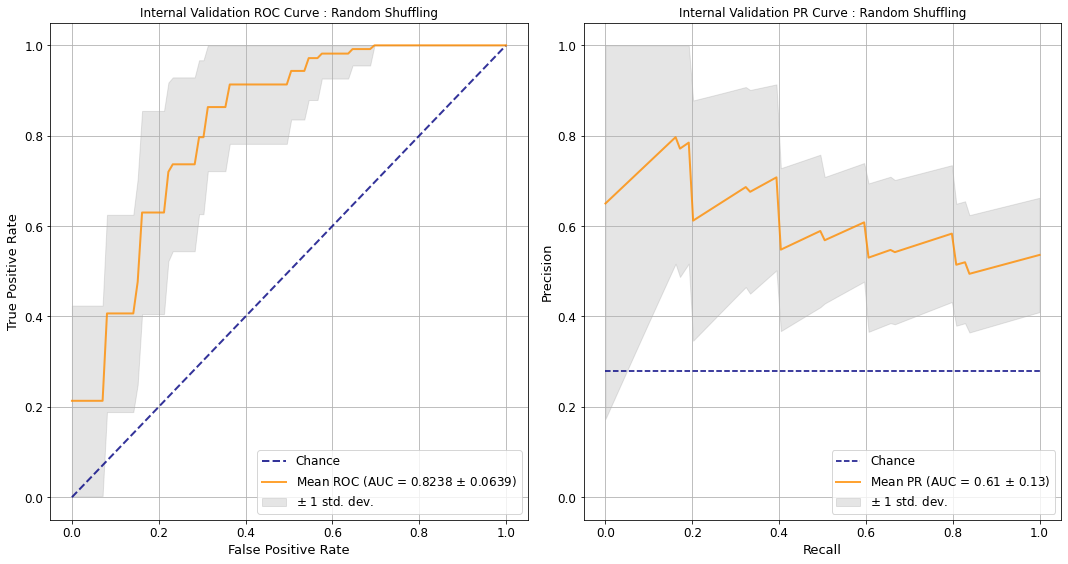

Best threshold (max gmean score) : 0.27
Best mean gmean score : 0.7782482077258648
Corresponding std at argmax best gmean score : 0.0822534169951432

Sensitivity = 0.9066666666666666 +- 0.12498888839501783
Specificity = 0.6785714285714286 +- 0.11370440706909272
Precision = 0.5335389610389611 +- 0.09350075089978906
Accuracy = 0.7415204678362574 +- 0.08400722698411944
Balanced accuracy = 0.7926190476190477 +- 0.0757405419916582
AUROC = 0.8250549450549451 +- 0.06392758955659854
AUPR = 0.6097590071965071 +- 0.13427248002826178


In [25]:
# Train each model and assess performances
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)     
plt.rc('axes', labelsize=13)

# Define opposite axis scaler
scaler = StandardScaler()
all_spectrum_standardized_bis = all_spectrum_standardized.copy()
for i in range(all_spectrum.shape[1]):
    standardized_Spectrum = scaler.fit_transform(np.array(all_spectrum_standardized.iloc[:,i]).reshape(-1,1))
    all_spectrum_standardized_bis.iloc[:,i] = np.reshape(standardized_Spectrum,(len(standardized_Spectrum),))
    
# Data init
X = all_spectrum_standardized_bis
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# Folds init
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)

# model init
log_reg = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=0.5)

# Estimate performances
lr_metrics = trainModel(X,y,model=log_reg,folds=rskf)

**Logistic Regression stratified by patient ID**

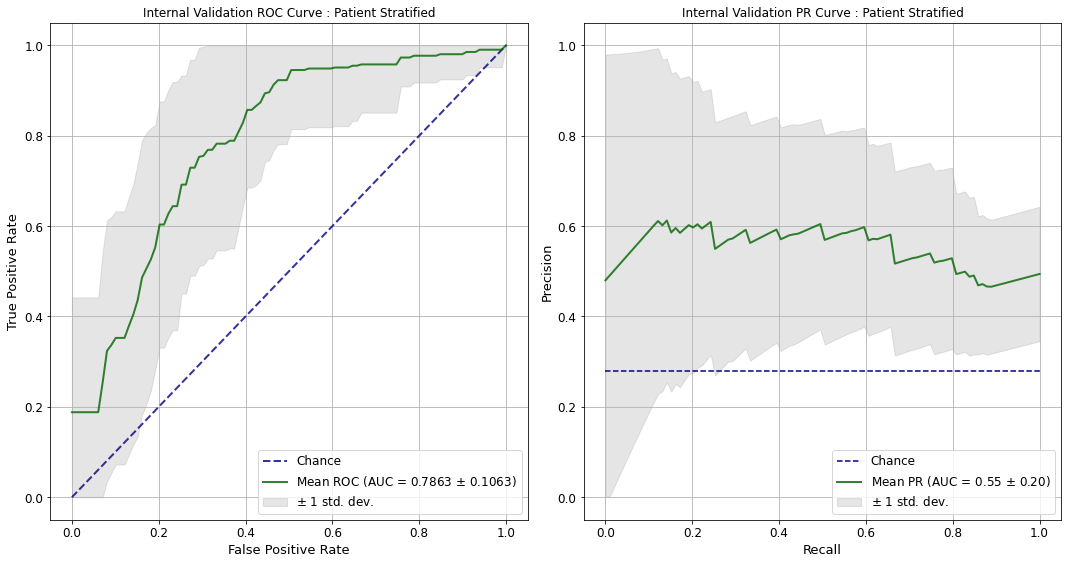

Best threshold (max gmean score) : 0.295
Best mean gmean score : 0.7348919482567182
Corresponding std at argmax best gmean score : 0.10433830955168581

Sensitivity = 0.7839206349206347 +- 0.18463531773281025
Specificity = 0.7088255910755911 +- 0.1327013381121493
Precision = 0.5261658896658896 +- 0.1765222257541266
Accuracy = 0.7210526315789474 +- 0.1048676781324804
Balanced accuracy = 0.746373112998113 +- 0.10280946915097885
AUROC = 0.7864340104340104 +- 0.10627719824099659
AUPR = 0.5517755181043299 +- 0.1954625292498694


In [26]:
# Train model by patient split and assess performances

# Data init
X = all_spectrum_standardized_bis
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()
groups = all_patientsID['PatientID']

# Model init
log_reg = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=0.5)

# Model training
lr_ps_metrics = trainModel_patientSplit(X,y,groups=groups,model=log_reg,splits=50)

**Logistic Regression lambda regularizer tuning**

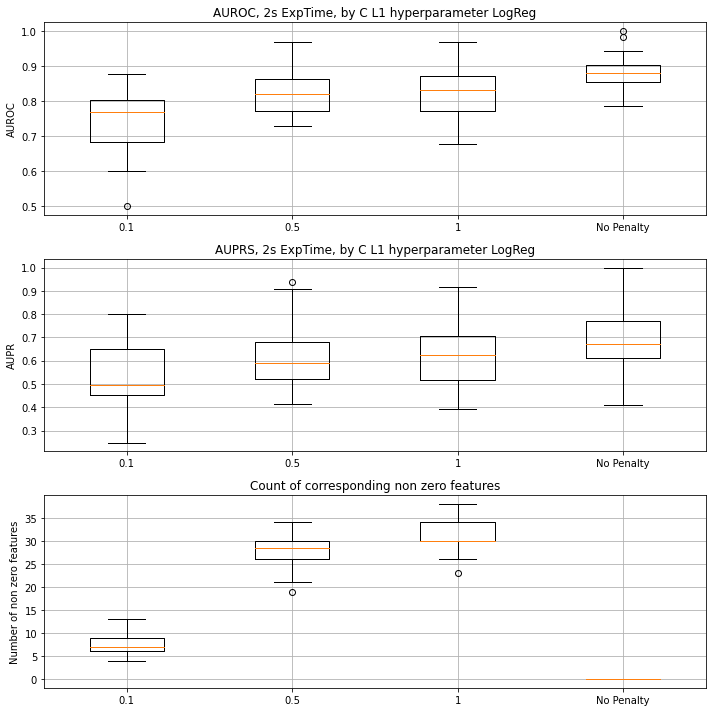

AUROC (c val = 0.1) = 0.7413736263736265 +- 0.097350100965978
AUROC (c val = 0.5) = 0.8250549450549451 +- 0.06392758955659854
AUROC (c val = 1) = 0.8241391941391942 +- 0.06990906547529502
AUROC (c val = 0) = 0.883956043956044 +- 0.049595311107711676

AUPR (c val = 0.1) = 0.5253171953390605 +- 0.14241023104923112
AUPR (c val = 0.5) = 0.6097590071965071 +- 0.13427248002826178
AUPR (c val = 1) = 0.6181352548595195 +- 0.13709623143275718
AUPR (c val = 0) = 0.6881640211640211 +- 0.14904602577999415


In [350]:
# Regularizer
c_values = [0.1, 0.5, 1]

# Folds init
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)

# C regularizer evaluation
all_aucs, all_auprs, all_nonZero = evaluateCeffect_LR(X,y,rskf,c_values)

# Print some results
c_values.append(0)
for i in range(np.shape(all_aucs)[0]):
    meanAUC = np.mean(np.array(all_aucs)[i,:])
    stdAUC = np.std(np.array(all_aucs)[i,:])
    print('AUROC (c val = ' + str(c_values[i]) + ') = ' + str(meanAUC) + ' +- ' +str(stdAUC))

print('')
for i in range(np.shape(all_aucs)[0]):
    meanAUPR = np.mean(np.array(all_auprs)[i,:])
    stdAUPR = np.std(np.array(all_auprs)[i,:])
    print('AUPR (c val = ' + str(c_values[i]) + ') = ' + str(meanAUPR) + ' +- ' +str(stdAUPR))

**Feature importance Logistic Regression**

    FrequencyBinsFeatures  Importance
0               1830.8720    0.244442
1                374.4138    0.231922
2                977.4033    0.212632
3               1350.8360    0.197347
4               1085.3020    0.196043
5                315.8243    0.195687
6                784.1433    0.178400
7                842.4360    0.161879
8               1301.9190    0.154615
9                932.7929    0.152605
10               396.8040    0.132982
11               871.3524    0.129059
12              1525.2550    0.092858
13              1110.9400    0.091705
14              2235.0970    0.069475
15               367.6815    0.035068
16              2233.5970    0.035027
17               644.2866    0.016311
    FrequencyBinsFeatures  Importance
0                2790.798   -0.657780
1                2486.224   -0.549635
2                2649.727   -0.304948
3                2561.647   -0.260499
4                2673.296   -0.245783
5                2970.903   -0.209200
6           

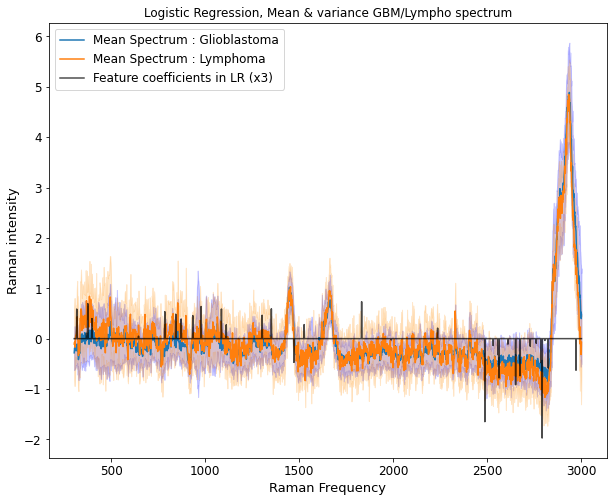

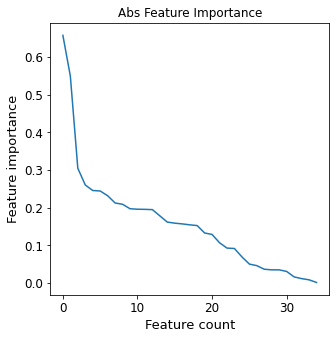

      FrequencyBinsFeatures  Importance
1438              2790.7980    0.657780
1207              2486.2240    0.549635
1328              2649.7270    0.304948
1262              2561.6470    0.260499
1346              2673.2960    0.245783
778               1830.8720    0.244442
32                 374.4138    0.231922
315                977.4033    0.212632
1587              2970.9030    0.209200
507               1350.8360    0.197347
369               1085.3020    0.196043
6                  315.8243    0.195687
1464              2823.1200    0.194978
221                784.1433    0.178400
249                842.4360    0.161879
1433              2784.5380    0.159013
572               1470.9030    0.157056
481               1301.9190    0.154615
293                932.7929    0.152605
42                 396.8040    0.132982
263                871.3524    0.129059
1258              2556.2240    0.106993
602               1525.2550    0.092858
382               1110.9400    0.091705


In [29]:
# Data init
X = all_spectrum_standardized_bis
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# Train on all data
log_reg_c = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=0.5)
log_reg_c.fit(X,y)

feature_importance = pd.DataFrame(ramanshift, columns=['FrequencyBinsFeatures'])
feature_importance['Importance'] = log_reg_c.coef_[0]
feature_importance = feature_importance.sort_values(by = ['Importance'], ascending=False)
#feature_importance.to_csv('feature_importance_LogisticRegression_c1.csv',index=False)
print(feature_importance.head(18).reset_index(drop=True))
feature_importance = feature_importance.sort_values(by = ['Importance'], ascending=True)
print(feature_importance.head(17).reset_index(drop=True))


plt.figure(figsize=[10,8])
plt.title('Logistic Regression, Mean & variance GBM/Lympho spectrum')
plt.xlabel('Raman Frequency')
plt.ylabel('Raman intensity')
plt.plot(x_axis_ticks, mean_GBM)
plt.plot(x_axis_ticks, mean_lympho)
plt.fill_between(x_axis_ticks, mean_GBM - std_GBM, mean_GBM + std_GBM, color='blue', alpha=.2)
plt.fill_between(x_axis_ticks, mean_lympho - std_lympho, mean_lympho + std_lympho, color='darkorange', alpha=.2)
plt.plot(x_axis_ticks, log_reg_c.coef_[0]*3, color='black',alpha=0.7)
plt.legend(['Mean Spectrum : Glioblastoma','Mean Spectrum : Lymphoma','Feature coefficients in LR (x3)'],loc='upper left')
plt.savefig('Features_importance.pdf', dpi=800)
plt.show()

feature_importance = pd.DataFrame(ramanshift, columns=['FrequencyBinsFeatures'])
feature_importance['Importance'] = np.abs(log_reg_c.coef_[0])
feature_importance = feature_importance.sort_values(by = ['Importance'], ascending=False)
plt.figure(figsize=[5,5])
plt.plot(feature_importance['Importance'].values[0:35])
plt.title('Abs Feature Importance')
plt.xlabel('Feature count')
plt.ylabel('Feature importance')
plt.show()

print(feature_importance.head(35))

**Random Forest**

In [310]:
# Random Forest

# Data init
X = all_spectrum_standardized
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# Model definition
RF_default = RandomForestClassifier(class_weight='balanced', random_state=0) # With default parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 5)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# cv
#cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 0)
#cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)

# Initialize grid search with 3 fold cross validation, 
rf_grid = GridSearchCV(estimator = RF_default, param_grid = param_grid, cv = cv, verbose=10, n_jobs = -1)

# Fit the random search model
rf_grid.fit(X,y)
print('Best parameters : ' + str(rf_grid.best_params_))

Fitting 20 folds for each of 225 candidates, totalling 4500 fits
Best parameters : {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 115}


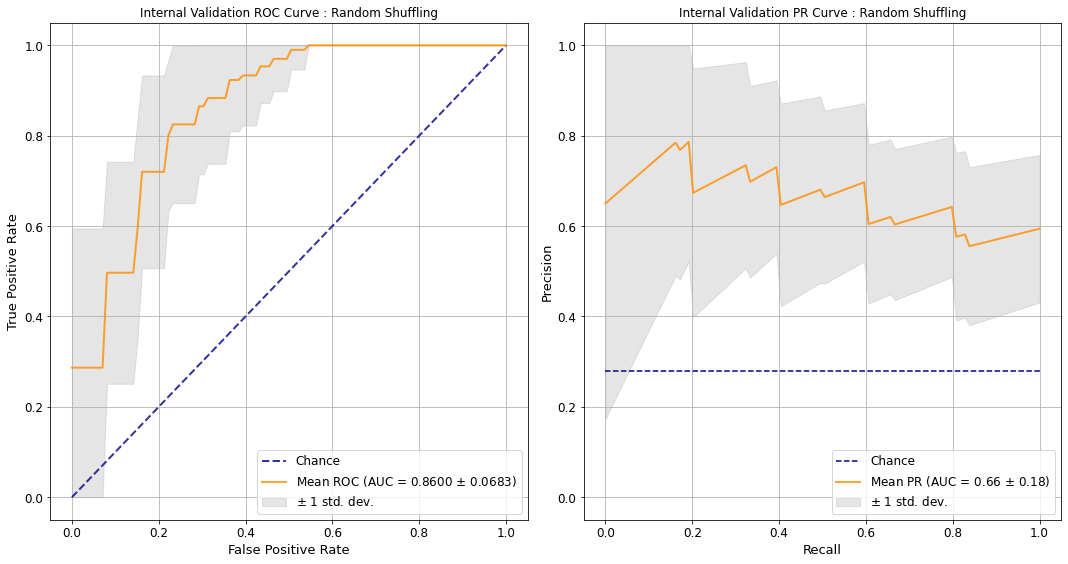

Best threshold (max gmean score) : 0.324
Best mean gmean score : 0.816086035898833
Corresponding std at argmax best gmean score : 0.08713969015708048

Sensitivity = 0.8949999999999999 +- 0.1261722808086009
Specificity = 0.7535714285714286 +- 0.12093249321213502
Precision = 0.6076569264069264 +- 0.1548140390712139
Accuracy = 0.7923976608187134 +- 0.09327897844186563
Balanced accuracy = 0.8242857142857144 +- 0.08489808948907149
AUROC = 0.8615384615384615 +- 0.06834196995578957
AUPR = 0.6611027837902838 +- 0.1810275919308837


In [30]:
#%% Estimation of performances on optimized RF hyperparameters

# Data init
X = all_spectrum_standardized
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# Folds init
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)

# Model init
#RF_opt = RandomForestClassifier(class_weight='balanced_subsample', random_state=0, **rf_grid.best_params_)
RF_opt = RandomForestClassifier(class_weight='balanced_subsample', random_state=0, n_estimators = 115, max_features = 'sqrt', 
                               max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, bootstrap='True')

# Estimate performances
metrics = trainModel(X,y,model=RF_opt,folds=rskf)

**RF by patient ID stratification**

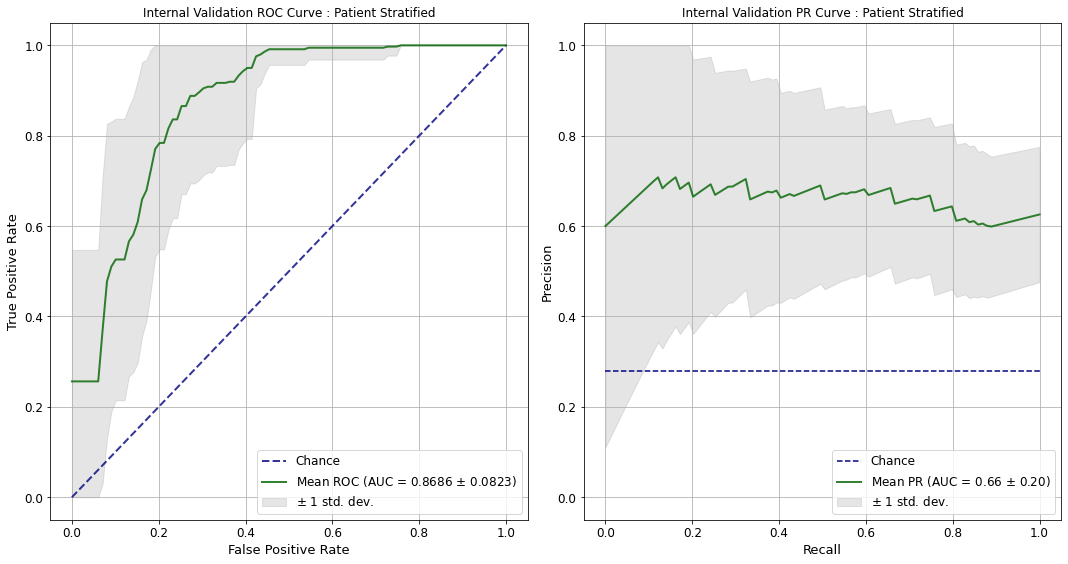

Best threshold (max gmean score) : 0.314
Best mean gmean score : 0.7925511036578956
Corresponding std at argmax best gmean score : 0.10573676705936946

Sensitivity = 0.9061666666666666 +- 0.14121510465354944
Specificity = 0.7110596903096904 +- 0.15565608704408995
Precision = 0.5646017316017315 +- 0.16906780994024054
Accuracy = 0.7578947368421052 +- 0.10989796325168999
Balanced accuracy = 0.8086131784881785 +- 0.09236933489163643
AUROC = 0.8689339271839274 +- 0.08234888989899933
AUPR = 0.6588629518189042 +- 0.19793284022009502


In [31]:
#%% Estimation of performances on optimized RF hyperparameters

# Data init
X = all_spectrum_standardized
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()
groups = all_patientsID['PatientID']

# Model init
RF_opt = RandomForestClassifier(class_weight='balanced', random_state=0, n_estimators = 115, max_features = 'sqrt', 
                               max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, bootstrap='True')

# Model training
metrics = trainModel_patientSplit(X,y,groups=groups,model=RF_opt,splits=50)

**Feature importance**

    FrequencyBinsFeatures  Importance
0                315.8243    0.017646
1               2967.3970    0.014216
2                383.3801    0.012916
3               2561.6470    0.012716
4                367.6815    0.011824
5               2235.0970    0.011784
6               2537.1680    0.011152
7               2805.7650    0.009960
8                376.6548    0.009712
9               1804.0100    0.009503
10               932.7929    0.009348
11               340.6790    0.008428
12              2198.9250    0.008219
13              2794.5470    0.007729
14              1988.2750    0.007353
15               390.0961    0.007270
16               784.1433    0.007115
17              2995.3030    0.006792
18               867.2301    0.006565
19              2064.5840    0.006526


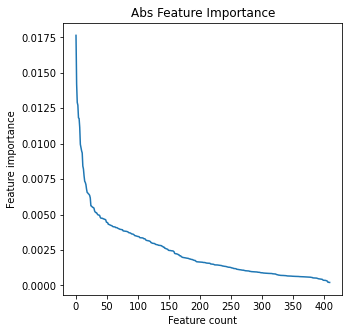

In [358]:
RF_opt_bis = RandomForestClassifier(class_weight='balanced_subsample', random_state=0, n_estimators = 115, max_features = 'sqrt', 
                               max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, bootstrap='True')

RF_opt_bis.fit(X,y)

feature_importance = pd.DataFrame(ramanshift, columns=['FrequencyBinsFeatures'])
feature_importance['Importance'] = np.abs(RF_opt_bis.feature_importances_)
feature_importance = feature_importance.sort_values(by = ['Importance'], ascending=False)
#feature_importance = feature_importance.reset_index(drop=True)


feature_importance.to_csv('feature_importance_RandomForest.csv',index=False)
print(feature_importance.head(20).reset_index(drop=True))

plt.figure(figsize=[5,5])
plt.plot(feature_importance['Importance'].values[0:410])
plt.title('Abs Feature Importance')
plt.xlabel('Feature count')
plt.ylabel('Feature importance')
plt.show()

**How correlated are features ?** **Compute correlation over windows**

Sum of feature importance for 3 features : 4.477794576669125 %


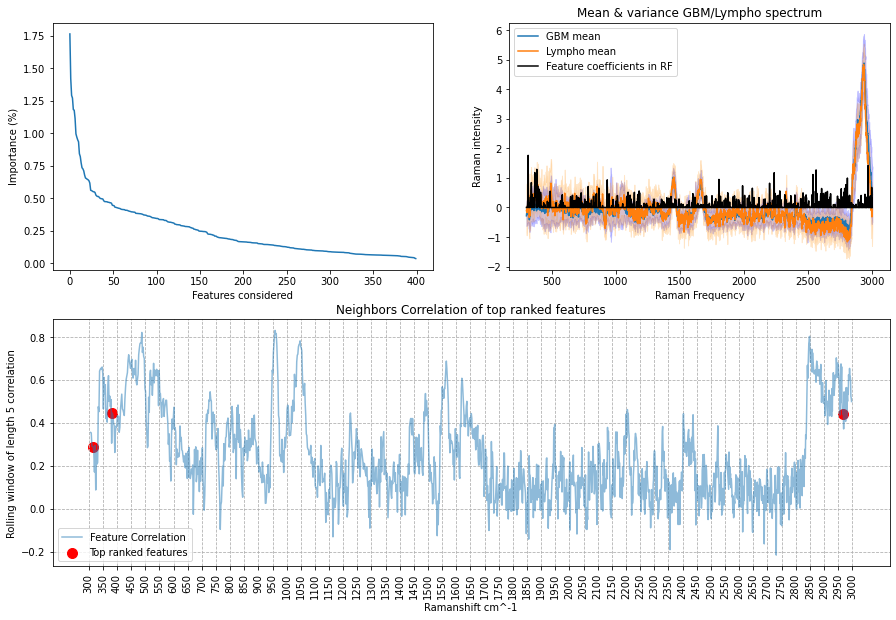

In [171]:
corr_featureWindow = []
corr_featureWindow.append(0)
corr_featureWindow.append(0)
for i in range(2,X.shape[1]-2):
    window_init = i - 2
    window_stop = i + 3
    corr_mat = X.iloc[:,window_init:window_stop].corr()
    avg_corr = (np.sum(corr_mat.iloc[2,:]) - 1)/4
    corr_featureWindow.append(avg_corr)

corr_featureWindow.append(0)
corr_featureWindow.append(0)
plt.figure()
plt.subplot(2,2,(3,4))
plt.plot(ramanshift[2:-2],corr_featureWindow[2:-2], alpha=0.5)
plt.xticks(range(300,3050,50),rotation ='vertical')
plt.xlabel('Ramanshift cm^-1')
plt.ylabel('Rolling window of length 5 correlation')
plt.grid(linestyle='--')

# Show top X features on this plot
topFeats = 3
indexes = np.array(feature_importance['FrequencyBinsFeatures'][0:topFeats].index.values).reshape(1,-1)
plt.scatter(np.array(ramanshift)[indexes],np.array(corr_featureWindow)[indexes],color='r',s=100)
plt.legend(['Feature Correlation', 'Top ranked features'])
plt.title('Neighbors Correlation of top ranked features')

# Feature importance ranked
plt.subplot(2,2,1)
plt.plot(100*feature_importance['Importance'][0:400].values)
plt.xlabel('Features considered')
plt.ylabel('Importance (%)')

# Sum of feature importance
print('Sum of feature importance for ' + str(topFeats) + ' features : ' +str(np.sum(feature_importance['Importance'][0:topFeats])*100) + ' %')

plt.subplot(2,2,2)
plt.title('Mean & variance GBM/Lympho spectrum')
plt.xlabel('Raman Frequency')
plt.ylabel('Raman intensity')

plt.plot(x_axis_ticks, mean_GBM)
plt.plot(x_axis_ticks, mean_lympho)
plt.fill_between(x_axis_ticks, mean_GBM - std_GBM, mean_GBM + std_GBM, color='blue', alpha=.2)
plt.fill_between(x_axis_ticks, mean_lympho - std_lympho, mean_lympho + std_lympho, color='darkorange', alpha=.2)
plt.plot(x_axis_ticks, np.abs(RF_opt_bis.feature_importances_)*100, color='black',alpha=1)
plt.legend(['GBM mean','Lympho mean','Feature coefficients in RF'],loc='upper left')
plt.show()

**RFE CV RF**

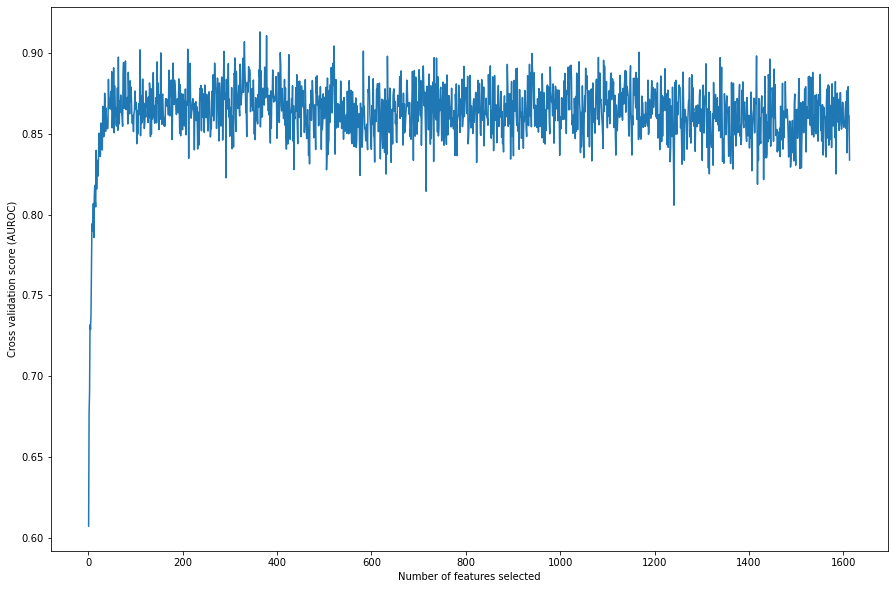

In [314]:
from sklearn.feature_selection import RFECV

# Model init
RF_opt_bis = RandomForestClassifier(class_weight='balanced_subsample', random_state=0, n_estimators = 115, max_features = 'sqrt', 
                                max_depth = 5, min_samples_split = 5, min_samples_leaf = 2, bootstrap='True')
# Model fit
RF_opt_bis.fit(X,y)

# RFECV Fit
rfecv = RFECV(estimator=RF_opt_bis, step=1, cv=rskf,
              scoring='roc_auc',min_features_to_select=1, verbose=0)

rfecv.fit(X,y) #Chosing a subset of 400 features

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (AUROC)')
plt.plot(range(1,
               len(rfecv.grid_scores_) + 1),
         rfecv.grid_scores_)
plt.show()

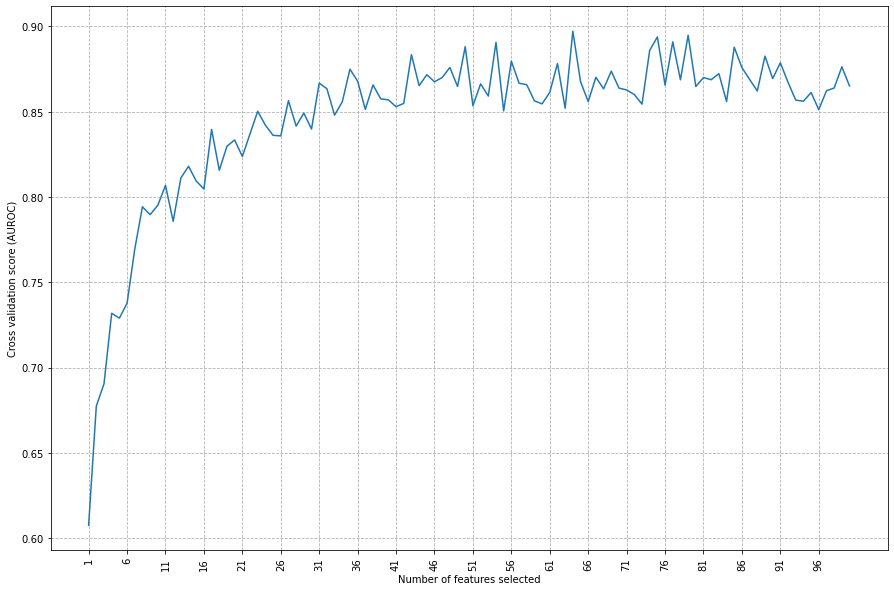

In [318]:
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (AUROC)')
#plt.plot(range(1,len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.plot(range(1,101),rfecv.grid_scores_[0:100])
plt.xticks(range(1,101,5),rotation ='vertical')
plt.grid(linestyle='--')
plt.show()

In [313]:
from sklearn.feature_selection import RFE

# RFE to look at overlap with LR
rfe = RFE(estimator=RF_opt_bis, n_features_to_select=50)
rfe.fit(X,y)

feature_importance = pd.DataFrame(ramanshift, columns=['FrequencyBinsFeatures'])
idx_rfe_support = [i for i, x in enumerate(rfe.support_) if x]
feature_importance.iloc[idx_rfe_support]

,FrequencyBinsFeatures
513,1362.052
550,1430.620
573,1472.726
598,1518.048
602,1525.255
623,1562.906
764,1807.378
884,2004.303
908,2042.489
1009,2198.925


**XGBoost**

In [21]:
import time
start_time = time.time()

# XGBoost Random Search CV
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

# Data init
X = all_spectrum_standardized
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# XGboost scaling of objective function (class-weighted) 
# is the ratio of number of negative class to the positive class.
scale_pos = np.round((len(y) - np.sum(y)) / np.sum(y),2)
xgboost_default = xgb.XGBClassifier(random_state=0, scale_pos_weight=scale_pos, eval_metric = "logloss")

# Semi-brute force
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)]
learning_rate = [0.10]
early_stopping_rounds = [10]
gamma = [0.1, 0.2 , 0.3, 0.4]
min_child_weight = [5]
subsample = [0.7, 0.8, 0.9]
colsample_bytree = [0.7, 0.8, 0.9]
colsample_bylevel = [0.8]
max_depth = [3, 4, 5, 6]
min_child_weight = [1, 3, 5, 7]
alpha = [1e-2, 0.1]
lambda_xgboost = [1]

# Create parameter grid
parameter_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'gamma': gamma,
              'subsample': subsample,
              'min_child_weight': min_child_weight,
              'colsample_bytree': colsample_bytree,
              'colsample_bylevel': colsample_bylevel
              #'alpha': alpha,
              #'lambda': lambda_xgboost,
              #'early_stopping_rounds': early_stopping_rounds,
              }

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=0)
grid_result = GridSearchCV(estimator = xgboost_default, cv = rskf, param_grid = parameter_grid, verbose=2, n_jobs=-1)

# Fit the random search model
grid_result.fit(X,y)

print("--- %s seconds ---" % (time.time() - start_time))

# Print best params
print(grid_result.best_params_)

XGBoost version: 1.3.3
Fitting 8 folds for each of 11520 candidates, totalling 92160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 89.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 92.4min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 96.7min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 148.2min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | 

--- 288352.6870751381 seconds ---
{'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 226, 'subsample': 0.8}


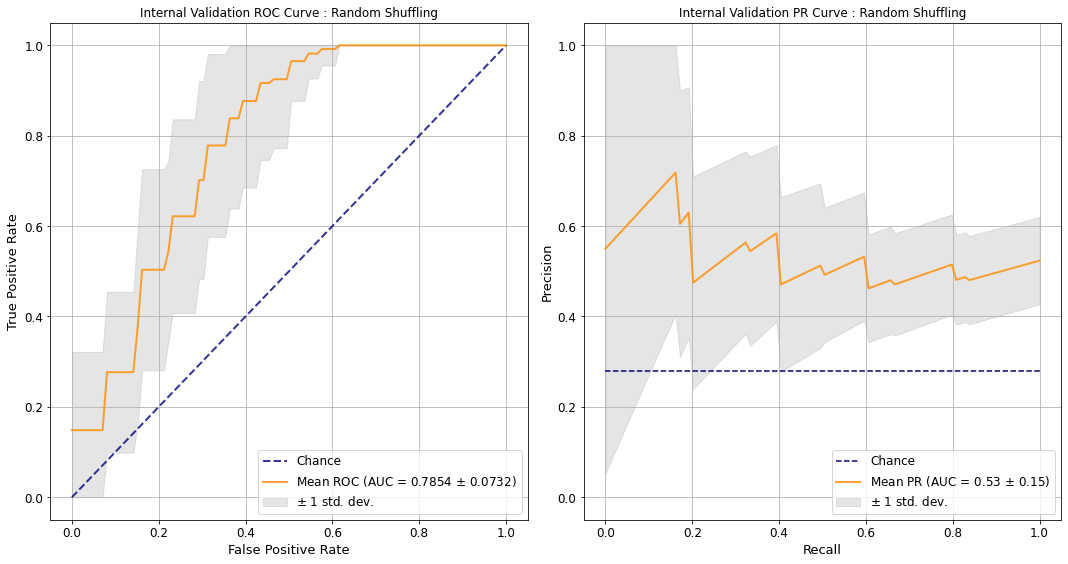

Best threshold (max gmean score) : 0.262
Best mean gmean score : 0.7429332760366671
Corresponding std at argmax best gmean score : 0.09698174422403727

Sensitivity = 0.8699999999999999 +- 0.16292465879799917
Specificity = 0.653021978021978 +- 0.13997812161927786
Precision = 0.5080899655899656 +- 0.10904081743444018
Accuracy = 0.7124269005847953 +- 0.09930022160330136
Balanced accuracy = 0.7615109890109891 +- 0.09026447242532185
AUROC = 0.7867765567765568 +- 0.07316311349251137
AUPR = 0.5314172424797424 +- 0.14946384791807482


In [32]:
#%% Estimation of performances on optimized XGB hyperparameters

# Data init
X = all_spectrum_standardized
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# Folds init
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)

# Model init
scale_pos = np.round((len(y) - np.sum(y)) / np.sum(y),2)
XGB_opt = XGBClassifier(random_state=0, colsample_bylevel=0.8,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        learning_rate=0.1,
                        max_depth=3,
                        min_child_weight=5,
                        n_estimators=226,
                        subsample=0.8, 
                        scale_pos_weight=scale_pos, eval_metric = "logloss")

# Estimate performances
xgb_metrics = trainModel(X,y,model=XGB_opt,folds=rskf)

**XGBoost on Patient Stratification**

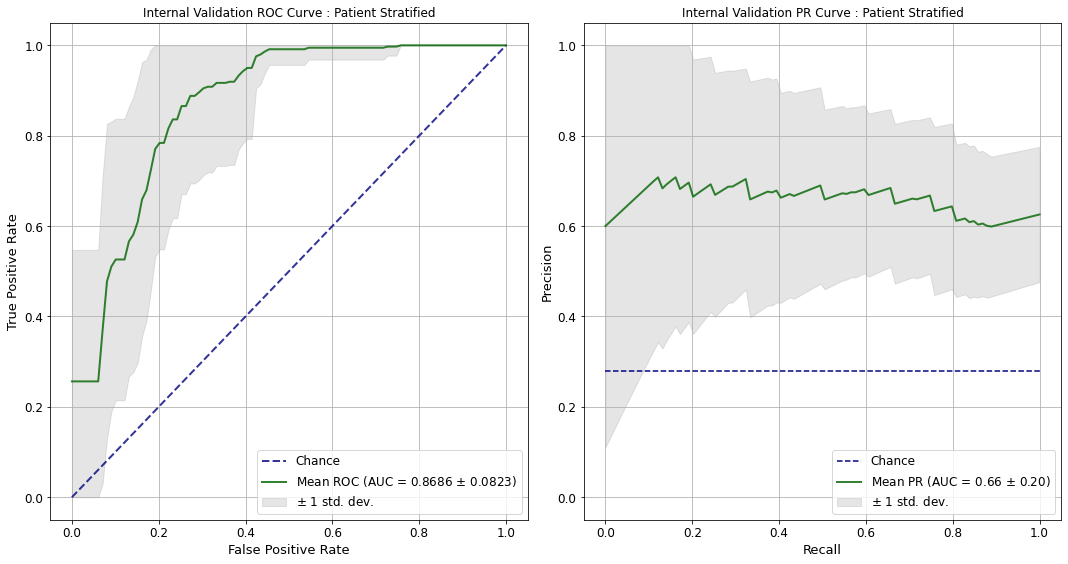

Best threshold (max gmean score) : 0.314
Best mean gmean score : 0.7925511036578956
Corresponding std at argmax best gmean score : 0.10573676705936946

Sensitivity = 0.9061666666666666 +- 0.14121510465354944
Specificity = 0.7110596903096904 +- 0.15565608704408995
Precision = 0.5646017316017315 +- 0.16906780994024054
Accuracy = 0.7578947368421052 +- 0.10989796325168999
Balanced accuracy = 0.8086131784881785 +- 0.09236933489163643
AUROC = 0.8689339271839274 +- 0.08234888989899933
AUPR = 0.6588629518189042 +- 0.19793284022009502


In [33]:
# Data init
X = all_spectrum_standardized
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(classes['Class'])).values.ravel()

# Folds init
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=0)

# Model init
scale_pos = np.round((len(y) - np.sum(y)) / np.sum(y),2)
XGB_opt = XGBClassifier(random_state=0, colsample_bylevel=0.8,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        learning_rate=0.1,
                        max_depth=3,
                        min_child_weight=5,
                        n_estimators=226,
                        subsample=0.8, 
                        scale_pos_weight=scale_pos, eval_metric = "logloss")

# Estimate performances
xgb_patient_metrics = trainModel_patientSplit(X,y,groups=groups,model=RF_opt,splits=50)

# MANOVA

In [22]:
from statsmodels.multivariate.manova import MANOVA

In [48]:
print(X.head(5))
print(y)

manova = MANOVA(endog=np.array(X.iloc[:,150:300]),exog=y)
print(manova.mv_test())

       0         1         2         3         4         5         6     \
0 -0.300165 -0.124134 -0.255470  0.021356  0.119720 -0.502872 -0.203326   
1 -0.624601 -0.390894  0.599164 -0.100954  0.072687 -0.008154  0.464914   
2  0.248500  0.254190 -0.743202 -0.277945  0.047885  0.049923 -0.090855   
3 -0.013240 -0.704723 -0.178825 -0.610564 -0.669644 -0.467067 -0.014224   
4 -0.518963 -0.213110 -0.460519 -0.226788 -0.297694 -0.214947 -0.235775   

       7         8         9     ...      1603      1604      1605      1606  \
0 -0.380174 -0.435321 -0.316118  ...  0.611850  0.324154  0.261805 -0.024036   
1  0.140351  0.182936 -0.082088  ...  2.968830  2.993620  3.002196  2.678218   
2 -0.182493 -1.154952 -0.351516  ...  0.296296  1.442987  1.699847  0.910655   
3 -0.060240 -0.336017 -0.661715  ...  0.480471  0.299499  0.854070  0.949179   
4 -0.073942 -0.119827 -0.213818  ...  0.939459  0.750308  1.110622  0.518608   

       1607      1608      1609      1610      1611      1612  
0 -0